<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/%EB%A7%88%EC%BC%80%ED%8C%85_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%A4%EB%AC%B4_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 직장인을 위한 데이터 실무 교재를 참고
깃허브 : https://github.com/Play-with-data/datasalon


## 사드 배치의 영향으로 중국인 관광객이 얼마나 줄었을까? 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 2019년 01월 데이터로 전처리 분석

*2010 1월부터 2019 8월에 이르는 관광목적 외국인 입국데이터   
: 파일 1개당 각 월 데이터 -> 반복문으로 불러오고 pd.concat 

* 2019년 1월 데이터 확인 

   *   xlsx 파일 확인해보니 2번째 행에 칼럼 정보들 수록 A~F : 입국목적 / G 합계 / H,I,J 는 요약정보 (제외)
   *   3~69번째 행까지국가,대륙별 관광객 수 데이터 
   *   70~ 73번째 레코드는 합계 및 성장률, 구성비등의 요약정보 -> 제외 



In [ ]:
# 데이터 호출 
df = pd.read_excel('/content/drive/MyDrive/datasalon/01_초판/3_Tourists_Event/files/kto_201901.xlsx',
                           header = 1 ,       #  2번째 인덱스를 칼럼으로 사용
                           usecols= 'A : G' , # 사용할 칼럼 개수 
                           skipfooter= 4)     # 마지막 제외  
df.head()                           

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [ ]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


평균 입국 목적 : 관광 > 기타 > 유학/연수 > 상용 ,,   
관광,상용,공용,유학/연수 목적 입국 최소값 : 0  

In [ ]:
# 각 칼럼에서 0인 부분이 있는 레코드 필터링 
condition = (df['관광'] == 0 ) \
              | (df['상용'] == 0 ) \
              | (df['공용'] == 0 ) \
              | (df['유학/연수'] == 0 )
df[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


이후 여러 df 합칠때 년월 칼럼이 필요함. 

In [ ]:
df['기준년월'] = '2019-01'

In [ ]:
df['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [ ]:
# 대륙 데이터는 제외 
continents_list = ['아시아주','미주','구주','대양주', '아프리카주', '기타대륙','교포소계' ]
condition = (df['국적'].isin(continents_list) ==  False) 
df_country = df[condition]
df_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [ ]:
df_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


: 필터링한 결과로 인해 인덱스가 1부터 시작 -> reset.index

In [ ]:
df_country.reset_index(drop =True , inplace  =True)
df_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


* 대륙 칼럼을 추가 : 국가별로 대륙을 매칭해야함 .

In [ ]:
continents = ['아시아']*25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 \
+ ['아프리카'] * 2 +['기타대륙'] + ['교포'] 
df_country['대륙'] = continents 
df_country.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


* 국적별 관광객 비율을 확인 (칼럼)

In [ ]:
percent = round((df_country['관광'] / df_country['계']) *100, 1)
percent

0     96.3
1     98.2
2     96.5
3     97.5
4     82.3
5     86.3
6     46.9
7     75.3
8     85.0
9     24.7
10    53.2
11    26.7
12    12.2
13    23.1
14    11.9
15    23.6
16    85.4
17    81.5
18    32.6
19    90.3
20    44.4
21    34.0
22    61.1
23    87.3
24    34.3
25    68.5
26    64.5
27    69.2
28    70.8
29    68.0
30    78.7
31    71.9
32    67.7
33    70.2
34    85.9
35    82.1
36    72.1
37    69.2
38    68.9
39    69.1
40    70.1
41    73.8
42    62.1
43    73.8
44    48.0
45    65.9
46    26.2
47    68.5
48    46.0
49    47.2
50    35.7
51    53.9
52    61.0
53    89.6
54    74.5
55    90.4
56    36.8
57    28.6
58    61.1
59     0.0
dtype: float64

In [ ]:
df_country['관광객비율(%)'] = percent

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_country.tail(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
50,불가리아,154,1,1,10,265,431,2019-01,유럽,35.7
51,폴란드,713,10,0,27,574,1324,2019-01,유럽,53.9
52,구주 기타,1809,44,25,91,996,2965,2019-01,유럽,61.0
53,오스트레일리아,12795,93,17,34,1346,14285,2019-01,오세아니아,89.6
54,뉴질랜드,2029,20,17,5,654,2725,2019-01,오세아니아,74.5
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카,36.8
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카,28.6
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙,61.1
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0


* 관광객 비율 top 5

In [ ]:
df_country.sort_values(by = '관광객비율(%)', ascending =False)[:5]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [ ]:
# 관광객 비율 최저 탑 5
df_country.sort_values(by = '관광객비율(%)')[:5]


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


* 대륙 별 관광객 비율의 평균 

In [ ]:
grouped = df_country.groupby('대륙')
grouped['관광객비율(%)'].mean()

대륙
교포        0.000000
기타대륙     61.100000
아메리카     68.200000
아시아      59.624000
아프리카     32.700000
오세아니아    84.833333
유럽       63.826087
Name: 관광객비율(%), dtype: float64

In [ ]:
# 피벗 테이블 생성 
df_country.pivot_table(values = '관광객비율(%)',
                       index = '대륙',
                       aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


: 오세아니아의 관광객 비율 1등 , 아프리카 관광목적 꼴등

In [ ]:
# 중국인 관광목적 
df_country[df_country['국적'] == '중국']

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


* 기준년월 별 전체 외국인 관광객의 국적별 관광객 비율 :  
 국적별 관광객 / 전체 관광목적 외국인 총계

In [ ]:
tourist_sum = sum(df_country['관광'])
tourist_sum

884293

In [ ]:
# 전체 비율 
percent = round((df_country['관광'] / tourist_sum) *100 , 1)
percent

0     22.5
1      9.8
2      3.9
3      0.3
4      3.8
5      2.2
6      1.6
7      1.6
8      0.9
9      0.1
10     1.2
11     0.3
12     0.0
13     0.0
14     0.0
15     0.1
16     0.9
17    36.2
18     0.0
19     0.1
20     0.1
21     0.2
22     0.2
23     0.2
24     0.2
25     4.9
26     0.9
27     0.1
28     0.1
29     0.2
30     0.9
31     0.6
32     0.4
33     0.2
34     0.1
35     0.1
36     0.2
37     0.1
38     0.1
39     0.1
40     0.1
41     0.1
42     0.1
43     0.0
44     0.0
45     0.0
46     0.1
47     2.0
48     0.0
49     0.0
50     0.0
51     0.1
52     0.2
53     1.4
54     0.2
55     0.1
56     0.0
57     0.1
58     0.0
59     0.0
Name: 관광, dtype: float64

In [ ]:
df_country['전체비율(%)'] = percent
df_country.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [ ]:
df_country.sort_values(by = '전체비율(%)', ascending =False)[:5]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


: 중국인 관광객 비율이 총 관광객 비율의 36%를 차지함! 

### 데이터 전처리 과정을 함수로 만들기 -> 2010.01~ 2019.08 진행

* 데이터 전처리 과정. 
1. 데이터 호출 (경로지정 및 read)
2. 데이터 탐색 (info,describe , duplicated)
3. 기준년월 칼럼 추가 
4. 국적 데이터만 남기기 (대륙 정보 제거 )
5. 대륙 칼럼 만들기 
6. 국적별 관광객 비율 확인
7. 전체 외국인 관광객 대비 국적별 관광객 비율 

* 이 과정을 진행하는 함수를 생성

In [ ]:
def create_kto_data(yy,mm): 
  # 1, 불러올 파일 경로 지정
  file_path = '/content/drive/MyDrive/datasalon/01_초판/3_Tourists_Event/files/kto_{}{}.xlsx'.format(yy,mm)   # 반복문으로 데이터를 불러오기위해

  # 2. 엑셀 파일 로드 
  df = pd.read_excel(file_path , header =1, skipfooter = 4, usecols = 'A:G') 

  # 3. 기준연월 칼럼 추가 
  df['기준년월'] = '{}-{}'.format(yy,mm)

  # 4. 국적 칼럼에서 국적 데이터만 남기기.
  continents_list = ['아시아주','미주','구주','대양주', '아프리카주', '기타대륙','교포소계' ]
  condition = (df['국적'].isin(continents_list) ==  False) 
  df_country = df[condition].reset_index(drop =True)    #원본과 인덱스 다른 문제 해결 

  # 5.대륙 칼럼 추가 
  continents = ['아시아']*25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 +['기타대륙'] + ['교포'] 
  df_country['대륙'] = continents 
  
  # 6. 국적별 관광객 비율 
  percent = round((df_country['관광'] / df_country['계']) *100, 1)
  df_country['관광객비율(%)'] = percent

  # 7. 전체 관광객 중 국적별 관광객 비율 
  tourist_sum = sum(df_country['관광'])
  df_country['전체비율(%)'] = round((df_country['관광']/ tourist_sum)*100 ,1)

  # 8. 결과 출력.
  return df_country

In [ ]:
kto_test = create_kto_data(2010,12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,224684,1325,61,231,3505,229806,2010-12,아시아,97.8,44.9
1,대만,23851,44,1,84,541,24521,2010-12,아시아,97.3,4.8
2,홍콩,20595,50,0,33,729,21407,2010-12,아시아,96.2,4.1
3,마카오,1226,1,0,1,0,1228,2010-12,아시아,99.8,0.2
4,태국,25871,52,12,13,4697,30645,2010-12,아시아,84.4,5.2


* 하나의 파일로 합치기  
: df를 호출해 리스트에 넣어둠. -> pd.concat( 칼럼리스트)  
or df.append(df) : 세로로만 가능

In [ ]:
for yy in range(2010,2012) :
  for mm in range(1,13): 
    yymm = '{}{}'.format(yy,mm)
    print(yymm)

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112


: 파이썬 01,02 같이 앞에 0을 채운 형태 출력불가 ->  
문자열 변환후 zfill() 이용. zfill(n) ; n자리 수 앞을 0으로채움


In [ ]:
str(2).zfill(2)

'02'

In [ ]:
str(23).zfill(4)

'0023'

In [ ]:
for yy in range(2010,2012):
  for mm in range(1,13):
    mm_str = str(mm).zfill(2)
    yymm = '{}{}'.format(yy,mm_str)
    print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112


In [ ]:
# 201001~ 201908 데이터 결합 
for yy in range(2010, 2020):
  for mm in range(1,13):
    temp = create_kto_data(str(yy),str(mm).zfill(2))
    df = df.append(temp, ignore_index= True)

# 에러는 201909 데이터가 없기때문!

NameError: ignored

* 에러가 발생할 경우를 생각하여 try except 구문으로 사용 

In [ ]:
for yy in range(2010, 2020):
  for mm in range(1,13):
    try :
      temp = create_kto_data(str(yy),str(mm).zfill(2))
      df =df.append(temp, ignore_index= True)
    except : 
      pass

In [ ]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
13982,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
13983,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
13984,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
13985,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0
13986,교포,0,0,0,0,16560,16560,2019-08,교포,0.0,0.0


In [ ]:
pieces = []
for yy in range(2010, 2020):
  for mm in range(1,13):
    try :
      temp = create_kto_data(str(yy),str(mm).zfill(2))
      pieces.append(temp)
    except : 
      pass

df2 = pd.concat(pieces , ignore_index =True)

In [ ]:
df2.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0
6959,교포,0,0,0,0,16560,16560,2019-08,교포,0.0,0.0


In [ ]:
df =df2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


: 2010.01~ 201908 까지의 116개월의 데이터 

In [ ]:
# kto_total.xlsx 파일로 저장
df.to_excel('/content/drive/MyDrive/datasalon/01_초판/3_Tourists_Event/kto_total.xlsx', index =False)

### 데이터 시각화 

*월별 중국인 관광객 그래프

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasalon/01_초판/3_Tourists_Event/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [ ]:
# 한글 표시하기위한 옵션 (구글코랩)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
condition = df['국적'] == '중국'
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


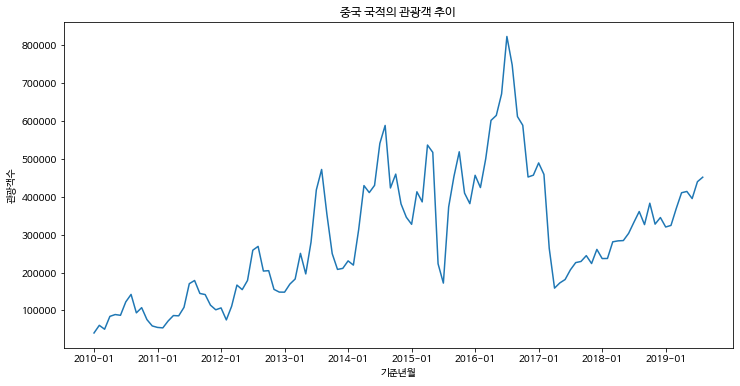

In [ ]:
# 시계열 그래프 
plt.figure(figsize =(12,6))
plt.plot(df_filter['기준년월'], df_filter['관광']) # x,y

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

## 그래프 표현하기 
plt.show()


* 국내 외국인 관광객 중 탑 5 그래프 

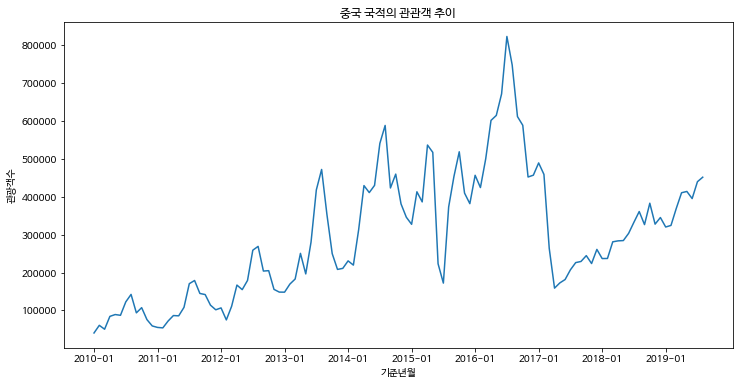

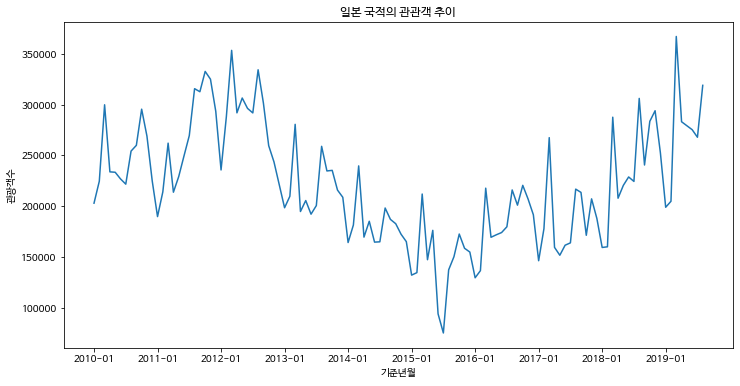

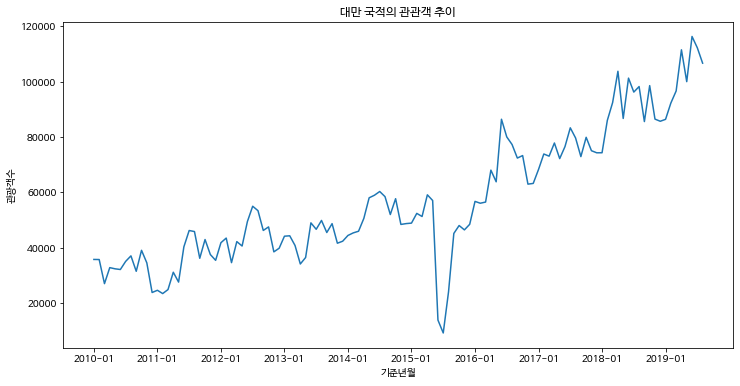

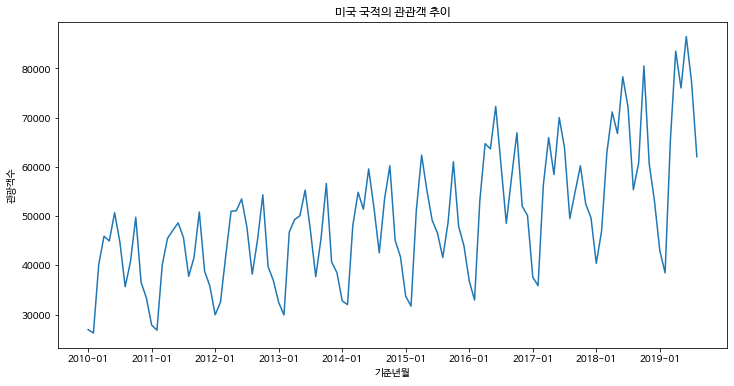

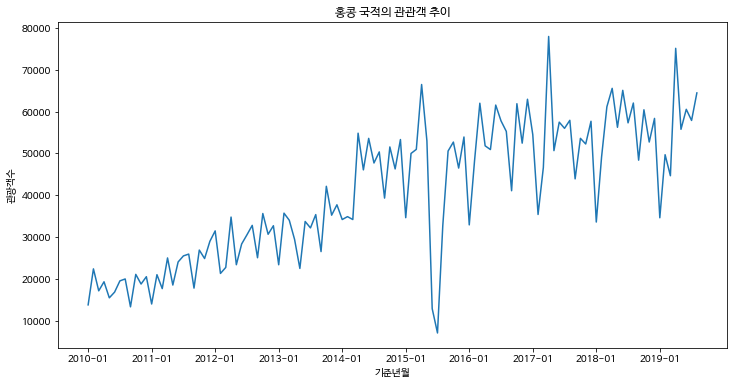

In [ ]:
cntry_list = ['중국','일본','대만','미국','홍콩']

for cntry in cntry_list :
  condition = df['국적'] == cntry
  df_filter = df[condition]

  # 그래프 그리기 
  plt.figure(figsize =(12,6))
  plt.plot(df_filter['기준년월'], df_filter['관광']) # x,y

  ## 그래프 정보 
  plt.title('{} 국적의 관관객 추이'.format(cntry))
  plt.xlabel('기준년월')
  plt.ylabel('관광객수')

  ## x 축 눈금 값 설정 
  plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])


* 하나의 그래프에 여러 선그래프를 표현 하려면 ?   
: 한 ax 객체에 여러번 plot() 그래프 그리면 됌.

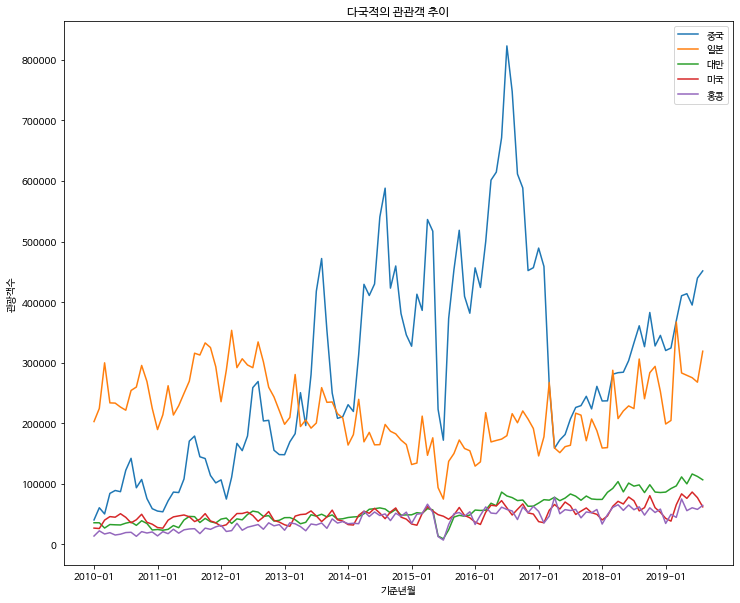

In [ ]:
cntry_list = ['중국','일본','대만','미국','홍콩']

# 그래프 그리기 (그림판을 전역변수로)
fig = plt.figure(figsize =(12,10))
ax = fig.add_subplot()

for cntry in cntry_list :
  condition = df['국적'] == cntry
  df_filter = df[condition]
  
  ax.plot(df_filter['기준년월'], df_filter['관광']) # x,y

## 그래프 정보 
plt.title('다국적의 관관객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])
# legend
plt.legend(labels = cntry_list , loc = 'best')

* 히트맵 그래프 : 매트릭스   
x :월, y : 년도 , 표현 : 관광객 수 

In [ ]:
df.head()
# 기준년월 -> 년 / 월로 나누기 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


* 년월일 -> 년 / 월 / 일 나누기   
2019-01: str.split('-').str[0,1,2] or str.slice(0,4)(5,7)

In [ ]:
df['년도'] = df['기준년월'].str.split('-').str[0]
df['년도']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6955    2019
6956    2019
6957    2019
6958    2019
6959    2019
Name: 년도, Length: 6960, dtype: object

In [ ]:
df['월'] = df['기준년월'].str.split('-').str[1]
df['월']

0       01
1       01
2       01
3       01
4       01
        ..
6955    08
6956    08
6957    08
6958    08
6959    08
Name: 월, Length: 6960, dtype: object

In [ ]:
condition = df['국적'] == '중국'
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [ ]:
# 그룹화-> 피벗테이블 
df_pivot = df_filter.pivot_table(values = '관광',
                                 index ='년도',
                                 columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


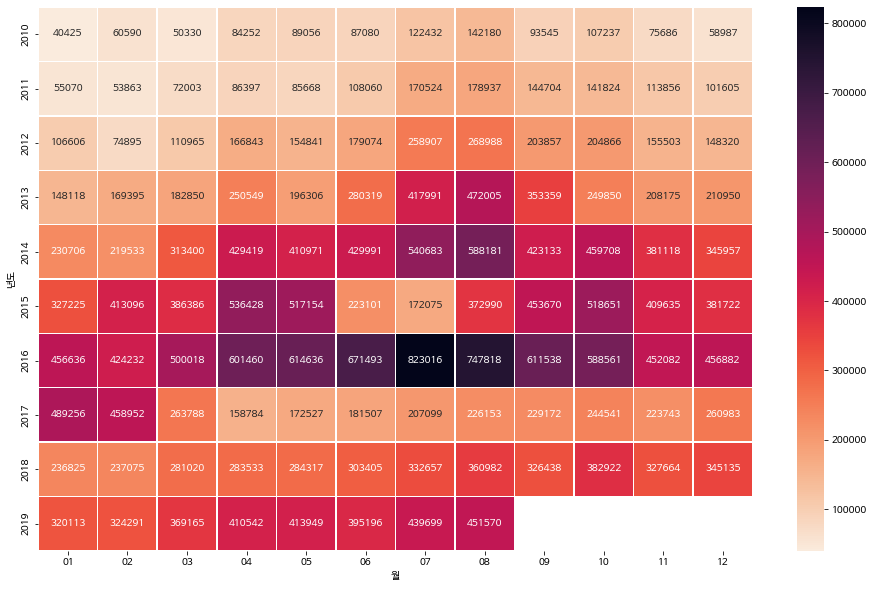

In [ ]:
# 히트맵 그래프 
plt.figure(figsize = (16,10))
sns.heatmap(df_pivot , annot = True, fmt = '.0f', cmap ='rocket_r', linewidth = 0.5) 
# df , annot = 표시 , fmt = 숫자형태 , '.0f' : 소수점없는 실수형 1f = 0.2


* 상위 5개국 히트맵 

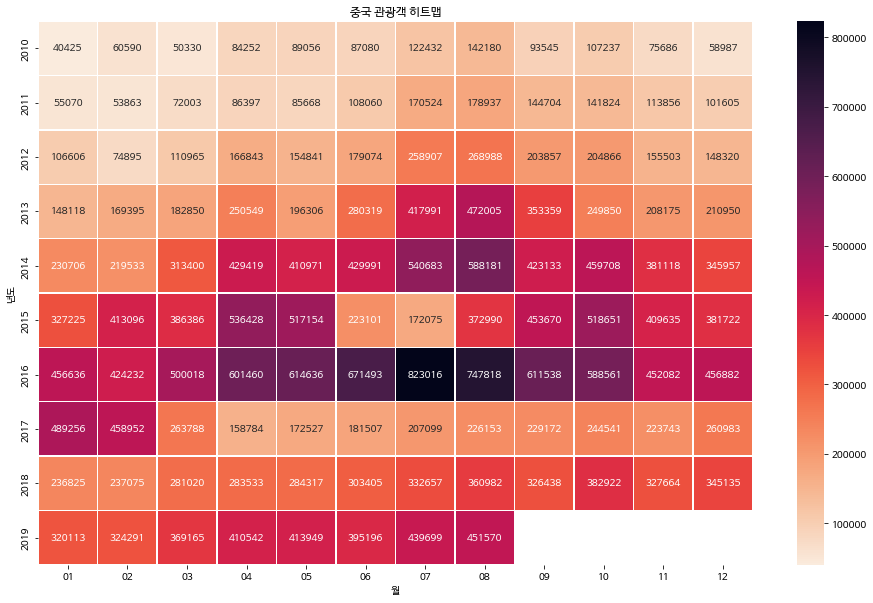

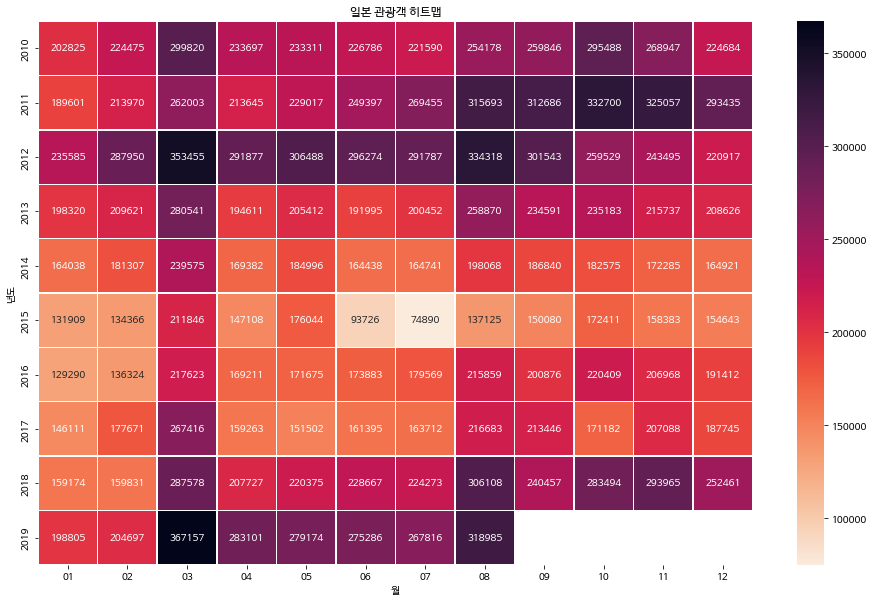

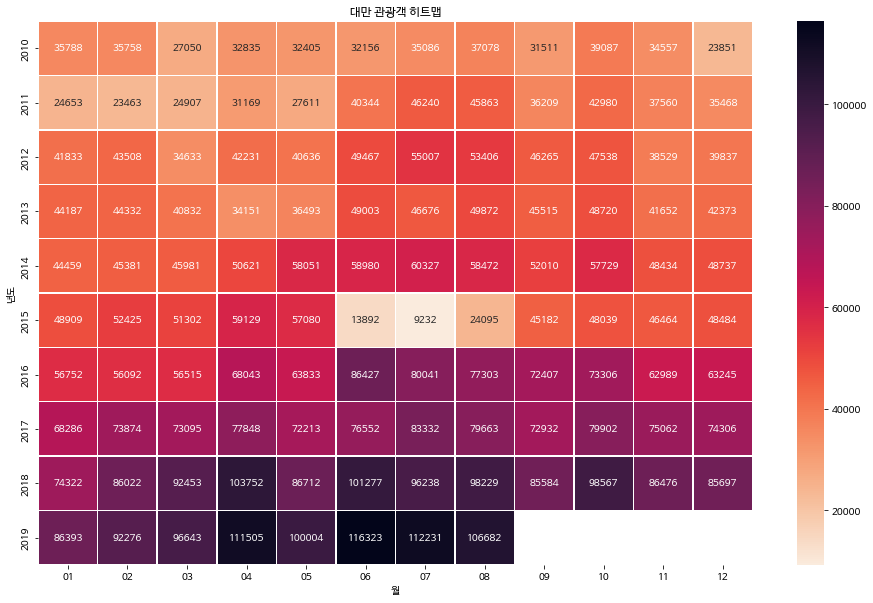

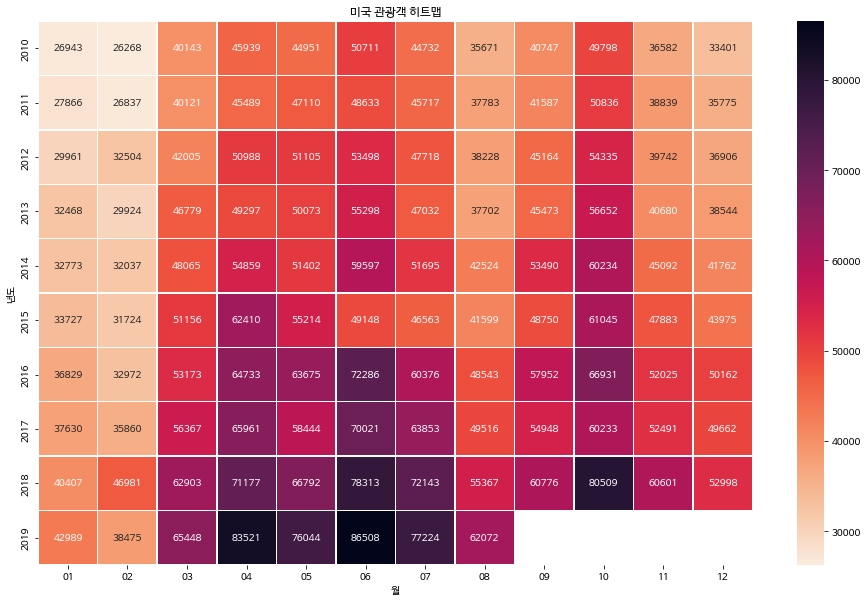

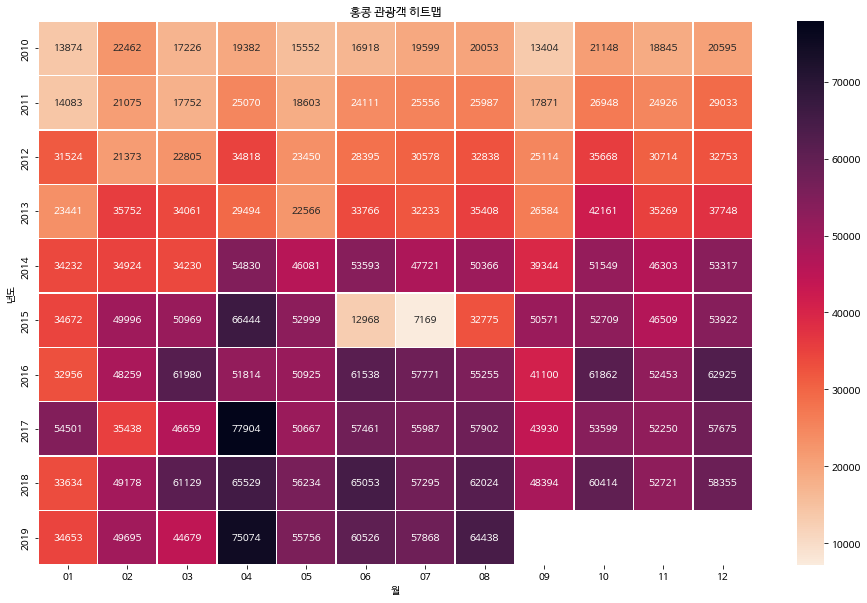

In [ ]:
cntry_list = ['중국','일본','대만','미국','홍콩']

for cntry in cntry_list :
  condition = df['국적'] == cntry
  df_filter = df[condition]

  df_pivot = df_filter.pivot_table(values= '관광', index= '년도', columns ='월')

  # 그래프 그리기 
  plt.figure(figsize =(16,10))
  sns.heatmap(df_pivot ,  annot = True, fmt = '.0f', cmap ='rocket_r', linewidth = 0.5)

  ## 그래프 정보 
  plt.title('{} 관광객 히트맵'.format(cntry))
  